In [1]:
# google driveのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# sys.pathの設定
import sys
sys.path.append('/content/drive/My Drive/DNN_code')

In [3]:
# import と関数定義
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
  print('***' + text + '***')
  print(vec)
  print('')

確率的勾配降下法

In [4]:
def f(x):
  y = 3 * x[0] + 2 * x[1]
  return y


# 初期設定
def init_network():
  network = {}
  nodesNum = 10
  # 平均0、分散1（標準偏差1）の正規分布（標準正規分布）に従う乱数を返す
  # https://note.nkmk.me/python-numpy-random/
  network['W1'] = np.random.randn(2, nodesNum)
  network['W2'] = np.random.randn(nodesNum)
  network['b1'] = np.random.randn(nodesNum)
  network['b2'] = np.random.randn()

  print_vec('重み1', network['W1'])
  print_vec('重み2', network['W2'])
  print_vec('バイアス1', network['b1'])
  print_vec('バイアス2', network['b2'])

  return network

init_network()


***重み1***
[[-0.42571981  0.61947231 -1.69456649  0.53242637  0.17557145  0.03071024
   0.33561108 -0.16438472  1.78119173  0.43065084]
 [-1.22030056  0.19212638 -0.09452662 -0.46032639 -1.31163416  1.81800648
   0.01774129  1.81217612  1.84698723  1.58963054]]

***重み2***
[-0.46434778  0.75035464  0.43131237 -0.71874885 -2.10284021 -0.7951899
  0.60042577  1.83022794  0.04215345  0.52650492]

***バイアス1***
[-0.72968522  0.89581745 -0.95390216 -0.51555369 -0.28282621  1.79465577
 -0.32577086  1.67699746 -1.12898147  0.69899514]

***バイアス2***
-1.1004408562431767



{'W1': array([[-0.42571981,  0.61947231, -1.69456649,  0.53242637,  0.17557145,
          0.03071024,  0.33561108, -0.16438472,  1.78119173,  0.43065084],
        [-1.22030056,  0.19212638, -0.09452662, -0.46032639, -1.31163416,
          1.81800648,  0.01774129,  1.81217612,  1.84698723,  1.58963054]]),
 'W2': array([-0.46434778,  0.75035464,  0.43131237, -0.71874885, -2.10284021,
        -0.7951899 ,  0.60042577,  1.83022794,  0.04215345,  0.52650492]),
 'b1': array([-0.72968522,  0.89581745, -0.95390216, -0.51555369, -0.28282621,
         1.79465577, -0.32577086,  1.67699746, -1.12898147,  0.69899514]),
 'b2': -1.1004408562431767}

In [5]:
# 順伝播
def forward(network, x):
  W1, W2 = network['W1'], network['W2']
  b1, b2 = network['b1'], network['b2']
  u1 = np.dot(x, W1) + b1
  z1 = functions.relu(u1)

  u2 = np.dot(z1, W2) + b2
  y = u2

  return z1, y

def backward(network, x, d, z1, y):
  # print('\n### 誤差逆伝播開始 ###')

  grad = {}

  W1, W2 = network['W1'], network['W2']
  b1, b2 = network['b1'], network['b2']

  # 出力層のデルタ
  delta2 = functions.d_sigmoid_with_loss(d, y)

  # b2の勾配
  grad['b2'] = np.sum(delta2, axis=0)
  # W2の勾配
  grad['W2'] = np.dot(z1.T, delta2)

  # 中間層でのデルタ
  delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)
  delta1 = delta1[np.newaxis, :]

  # b1の勾配
  grad['b1'] = np.sum(delta1, axis=0)
  x = x[np.newaxis, :]
  # W1の勾配
  grad['W1'] = np.dot(x.T, delta1)

  # print_vec('偏微分_dE/du2', delta2)
  # print_vec('偏微分_dE/du1', delta1)

  # print_vec('偏微分_重み1', grad['W1'])
  # print_vec('偏微分_重み2', grad['W2'])
  # print_vec('偏微分_バイアス1', grad['b1'])
  # print_vec('偏微分_バイアス2', grad['b2'])

  return grad


***重み1***
[[-1.16104004  0.63501613  0.68367999 -0.65356431 -0.87944023 -0.3647958
  -0.031062    0.53983673 -0.49313489  0.85130786]
 [ 0.06590446  0.78895771 -0.22277303  0.19226576  0.17295633 -0.50701398
   0.19666318  0.35400706  0.99103694 -0.79954122]]

***重み2***
[-1.46808664  0.24905474  0.42005202 -0.29482477  0.36743813  0.31203224
  1.20545246  1.64013832 -0.43671098 -0.97994962]

***バイアス1***
[ 1.1221729  -1.27919291  1.25816642  1.04426538 -0.60605425  2.10516662
  0.0390976  -1.00984054 -0.55564075 -0.02780471]

***バイアス2***
0.46964495930779737

### 結果表示 ###


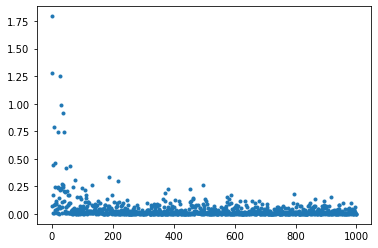

In [6]:
# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
  data_sets[i] = {}
  # ランダムな値を設定
  # np.random.rand()は[0.0, 1.0)（0.0以上、1.0未満）の乱数を返す。
  data_sets[i]['x'] = np.random.rand(2)

  # 目標出力を設定
  data_sets[i]['d'] = f(data_sets[i]['x'])

losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)


# 勾配降下の繰り返し
for dataset in random_datasets:
  x, d = dataset['x'], dataset['d']
  z1, y = forward(network, x)
  grad = backward(network, x, d, z1, y)
  # パラメータに勾配適用
  for key in ('W1', 'W2', 'b1', 'b2'):
    network[key] -= learning_rate * grad[key]
  
  # 誤差
  loss = functions.mean_squared_error(d, y)
  losses.append(loss)

print('### 結果表示 ###')
lists = range(epoch)

plt.plot(lists, losses, '.')

# グラフの表示
plt.show()
